In [ ]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import urllib
import cv2


In [ ]:
from google.colab import files
upload= files.upload()
upload= files.upload()
upload= files.upload()
upload= files.upload()
upload= files.upload()

Saving hinton.jpg to hinton.jpg


Saving shapes.jpg to shapes.jpg


Saving humans_2.jpg to humans_2.jpg


Saving humans_1.jpg to humans_1.jpg


Saving brain.jpg to brain.jpg


# **Global Thresholding**

In [ ]:
def Global_Thresholding(img , th):
  #The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.
  ret1,th1 = cv2.threshold(img,th,255,cv2.THRESH_BINARY)
  return th1

Text(0.5, 1.0, 'Global Thresholding')

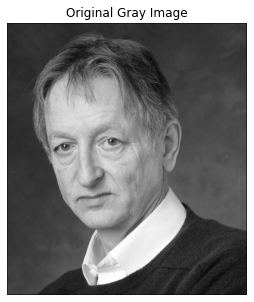

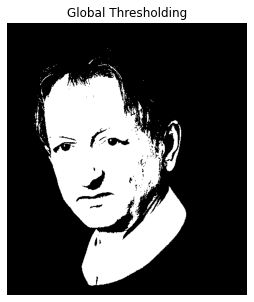

In [ ]:
img = cv2.imread('hinton.jpg', 0)
th = Global_Thresholding(img , 127)


plt.figure(figsize=(5,5))
plt.imshow(img , cmap = 'gray')
plt.axis('off')
plt.title('Original Gray Image')
plt.figure(figsize=(5,5))
plt.imshow(th, cmap = 'gray')
plt.axis('off')
plt.title('Global Thresholding')

# **Ostu Thresholding**

In [ ]:
def ostu(img ):
  # Otsu's thresholding
  ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return th2
def ostugaus(img  , blur):
  # Otsu's thresholding after Gaussian filtering
  blur = cv2.GaussianBlur(img,(blur,blur),0)
  ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return th3

Text(0.5, 1.0, 'Gaussian filtered Image')

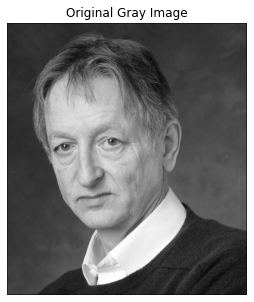

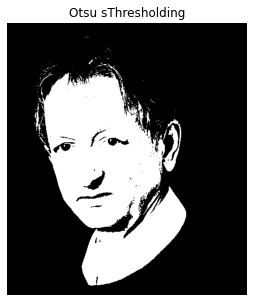

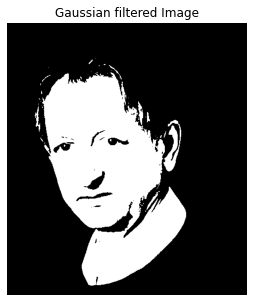

In [ ]:
img = cv2 .imread('hinton.jpg', 0)


th2 = ostu(img )
th3 = ostugaus(img ,3)

plt.figure(figsize=(5,5))
plt.imshow(img , cmap = 'gray')
plt.axis('off')
plt.title('Original Gray Image')
plt.figure(figsize=(5,5))
plt.imshow(th2, cmap = 'gray')
plt.axis('off')
plt.title('Otsu sThresholding')
plt.figure(figsize=(5,5))
plt.imshow(th3,cmap='gray')
plt.axis('off')
plt.title('Gaussian filtered Image')

# **Adaptive thressholding**

In [ ]:
def Adaptive_guassian(img , b , c ):
  #The threshold value is the mean of the neighbourhood area minus the constant C.
  th1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,b,c)
  #The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
  th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,b,c)

  return th1 , th2


Text(0.5, 1.0, 'Adaptive Gaussian Thresholding')

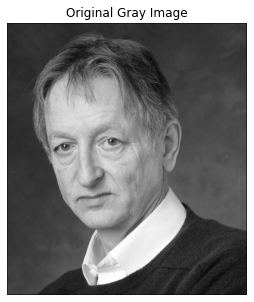

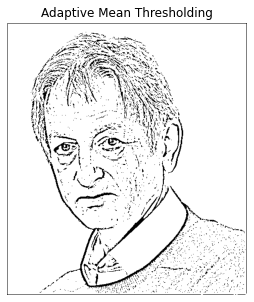

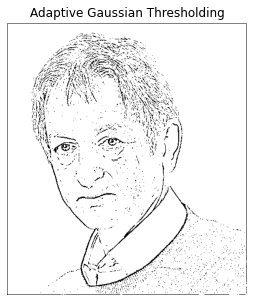

In [ ]:
img = cv2.imread('hinton.jpg', 0)

th1,th2 = Adaptive_guassian(img , 9 , 10)

plt.figure(figsize=(5,5))
plt.imshow(img , cmap = 'gray')
plt.axis('off')
plt.title('Original Gray Image')
plt.figure(figsize=(5,5))
plt.imshow(th1, cmap = 'gray')
plt.axis('off')
plt.title('Adaptive Mean Thresholding')
plt.figure(figsize=(5,5))
plt.imshow(th2, cmap = 'gray')
plt.axis('off')
plt.title('Adaptive Gaussian Thresholding')

# **3.B**

Text(0.5, 1.0, 'Otsu sThresholding')

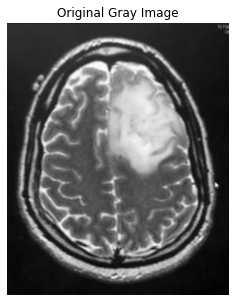

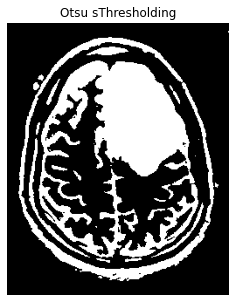

In [ ]:
img = cv2.imread('brain.jpg',0)
th2 = ostu(img)

plt.figure(figsize=(5,5))
plt.imshow(img , cmap = 'gray')
plt.axis('off')
plt.title('Original Gray Image')
plt.figure(figsize=(5,5))
plt.imshow(th2, cmap = 'gray')
plt.axis('off')
plt.title('Otsu sThresholding')

Text(0.5, 1.0, ' Weighted Brain Image')

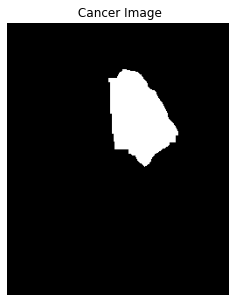

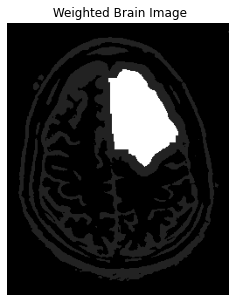

In [ ]:
kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(th2,kernel,iterations = 4)

output = cv2.addWeighted(th2, 0.1, erosion, 0.65, 0.0)

plt.figure(figsize=(5,5))
plt.imshow(erosion,cmap='gray')
plt.axis('off')
plt.title(' Cancer Image')

plt.figure(figsize=(5,5))
plt.imshow(output,cmap='gray')
plt.axis('off')
plt.title(' Weighted Brain Image')

# **3.C**

In [ ]:
def help(img,result):
    H = img[:,:,0]
    S = img[:,:,1]
    V = img[:,:,2] 
    # you shold implement part a,b,c and in the last use following code

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if result[i][j] == 0:
                #fig1[i][j] = 128
                H[i][j] = 0
                S[i][j] = 255
                V[i][j] = 0
            else:
                H[i][j] = 0
                S[i][j] = 0
                V[i][j] = 255
    img[:,:,0] = H
    img[:,:,1] = S
    img[:,:,2] = V
    
    
    return img



Text(0.5, 1.0, ' HSV Image')

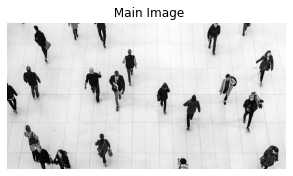

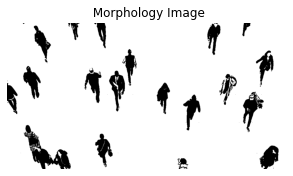

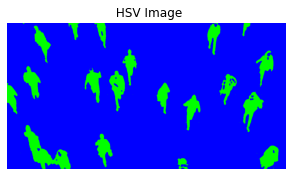

In [ ]:
img = cv2.imread('humans_1.jpg',0)
th = ostu(img)
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)

img_rgb = cv2.cvtColor(opening,cv2.COLOR_GRAY2RGB)
img_hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
out = help(img_hsv,opening)


plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(' Main Image')

plt.figure(figsize=(5,5))
plt.imshow(th,cmap='gray')
plt.axis('off')
plt.title(' Morphology Image')

plt.figure(figsize=(5,5))
plt.imshow(out,cmap='gray')
plt.axis('off')
plt.title(' HSV Image')


# **3.D**

Text(0.5, 1.0, ' HSV Image')

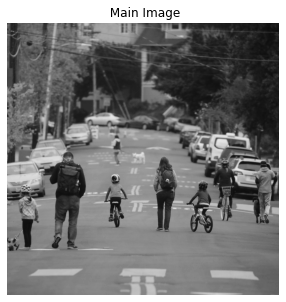

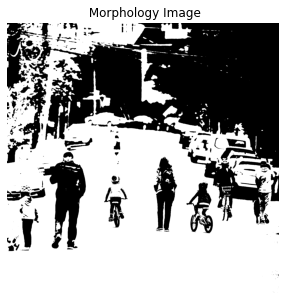

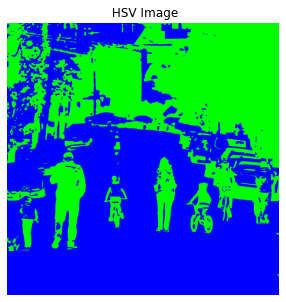

In [ ]:
kernel = np.ones((5,5),np.uint8)
img = cv2.imread('humans_2.jpg',0)
th = ostu(img)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
img_rgb = cv2.cvtColor(opening,cv2.COLOR_GRAY2RGB)
img_hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
out = help(img_hsv,opening)

plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title(' Main Image')

plt.figure(figsize=(5,5))
plt.imshow(th,cmap='gray')
plt.axis('off')
plt.title(' Morphology Image')

plt.figure(figsize=(5,5))
plt.imshow(out,cmap='gray')
plt.axis('off')
plt.title(' HSV Image')



# **Q4**

```
https://www.geeksforgeeks.org/how-to-detect-shapes-in-images-in-python-using-opencv/
```

In [ ]:


def fun(img):

# converting image into grayscale image
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
  th = ostu(gray)

  # using a findContours() function
  contours, _ = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # list for storing names of shapes
  for contour in contours:


    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
      x = int(M['m10']/M['m00'])
      y = int(M['m01']/M['m00'])


    if len(approx) == 4:
            x, y , w, h = cv2.boundingRect(approx)
            aspectRatio = float(w)/h
            if aspectRatio >= 0.95 and aspectRatio < 1.05:
                cv2.drawContours(img, [contour], -1, (125, 125, 0), -1)

    elif len(approx) == 5:
      pass

    elif len(approx) == 12:
            x, y , w, h = cv2.boundingRect(approx)
            aspectRatio = float(w)/h
        
            if(aspectRatio < 1):
                cv2.drawContours(img, [contour], -1, (200, 100, 0), -1)
            else:
                cv2.drawContours(img, [contour], -1, (0, 200, 0), -1)
    else:
            cv2.drawContours(img, [contour], -1, (200, 0, 200), -1)
  return img


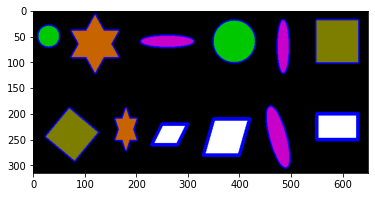

In [ ]:
img = cv2.imread('shapes.jpg')

img2 = fun(img)
plt.imshow(img2)